In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\dbnew\Achievement_6'

In [4]:
#Import data
df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'air_qual_cleaned.pkl'))

##### Missing values

In [11]:
# Check for missing values

df.isnull().sum()

WHO Region                                    0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
PM2.5 (μg/m3)                             17143
PM10 (μg/m3)                              11025
NO2 (μg/m3)                                9933
PM25 temporal coverage (%)                24856
PM10 temporal coverage (%)                26757
NO2 temporal coverage (%)                 12238
Reference                                     0
Number and type of monitoring stations    23480
Version of the database                       0
dtype: int64

For the variables we are going to explore, there are many missing values (about 1/3 of the data is missing), but as we learned in the previous exercise, most of the missing values appear to be in certain locations, as opposed to being spread evenly around the world. Therefore imputing values for locations where most of the data is missing might skew the results. We will remove the missing values so that we can implement our training model.

In [24]:
df_cleaned=df[['PM2.5 (μg/m3)','PM10 (μg/m3)']]

In [28]:
df_cleaned.dropna(inplace=True)

C:\Users\dbnew\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [29]:
df_cleaned.isnull().sum()

PM2.5 (μg/m3)    0
PM10 (μg/m3)     0
dtype: int64

In [30]:
df_cleaned.head()

,PM2.5 (μg/m3),PM10 (μg/m3)
0,12.63,29.04
1,18.91,37.40
2,14.86,36.34
3,35.47,54.22
4,23.39,130.19


##### Extreme values checks

In [5]:
df.columns

Index(['WHO Region', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database'],
      dtype='object')

C:\Users\dbnew\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM10 (μg/m3)', ylabel='Density'>

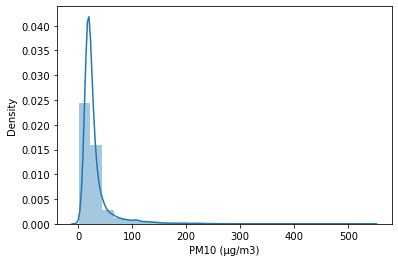

In [6]:
sns.distplot(df['PM10 (μg/m3)'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [7]:
df['PM10 (μg/m3)'].mean() # Check the mean

30.505043115701863

In [8]:
df['PM10 (μg/m3)'].median() # Check the median

22.0

In [9]:
df['PM10 (μg/m3)'].max() # Check the max

540.0

### 3. Data prep for regression analysis 

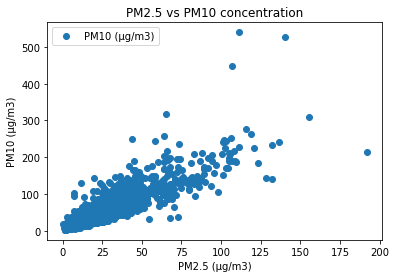

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'PM2.5 (μg/m3)', y='PM10 (μg/m3)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('PM2.5 vs PM10 concentration')  
plt.xlabel('PM2.5 (μg/m3)')  
plt.ylabel('PM10 (μg/m3)')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cleaned['PM2.5 (μg/m3)'].values.reshape(-1,1)
y = df_cleaned['PM10 (μg/m3)'].values.reshape(-1,1)

In [38]:
X

array([[12.63],
       [18.91],
       [14.86],
       ...,
       [34.49],
       [25.25],
       [42.56]])

In [37]:
y

array([[29.04],
       [37.4 ],
       [36.34],
       ...,
       [55.52],
       [45.71],
       [67.06]])

In [39]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [40]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [41]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

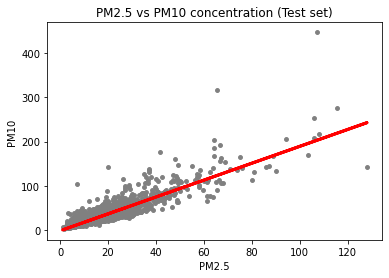

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('PM2.5 vs PM10 concentration (Test set)')
plot_test.xlabel('PM2.5')
plot_test.ylabel('PM10')
plot_test.show()

The regression line appears to fit fairly well, but it's not a perfectly linear relationship and there are many outliers. If the model worked, it would tell us that the PM10 concentrations are roughly double the PM2.5 concentrations.

In [44]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.91542255]]
Mean squared error:  164.9762912927285
R2 score:  0.7578046780085232


In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,28.93,49.344012
1,30.48,36.989536
2,53.11,67.827839
3,11.58,12.089043
4,23.33,25.822623
5,10.09,9.330835
6,23.80,19.003718
7,20.83,23.083568
8,15.17,17.720385
9,14.38,19.578345


The mean squared error is high, meaning that this may not be an accurate model.  However, the R2 value is 0.75, meaning the model explains variance betweem the data points fairly well. The actual and predicted values are not that close together. The model might be improved by removing extreme values and outliers. The data are biased by collection in that there are many missing values. Countries that have fewer resources to measure pollution or that don't bother to report their figures to the WHO would be underrepresented.